<a href="https://colab.research.google.com/github/cawiya/SG1.3_Projects/blob/master/mod7_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
#import csv file
hp_df = pd.read_csv("/content/drive/MyDrive/house_pricing_dataset.csv")
hp_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [19]:
#Range of house prices 
bins = [-1, 200000, 400000, 600000, 800000, 1000000, 1200000,1400000, np.inf]
names = ['<200000','200000-400000','400000-600000','600000-800000','800000-1000000','1000000-1200000','1400000-1600000','1600000+']
df['price_range'] = pd.cut(df['price'], bins, labels=names)
df['price_range'].value_counts()

200000-400000      1567
400000-600000      1417
600000-800000       718
800000-1000000      320
<200000             238
1600000+            129
1000000-1200000     124
1400000-1600000      87
Name: price_range, dtype: int64

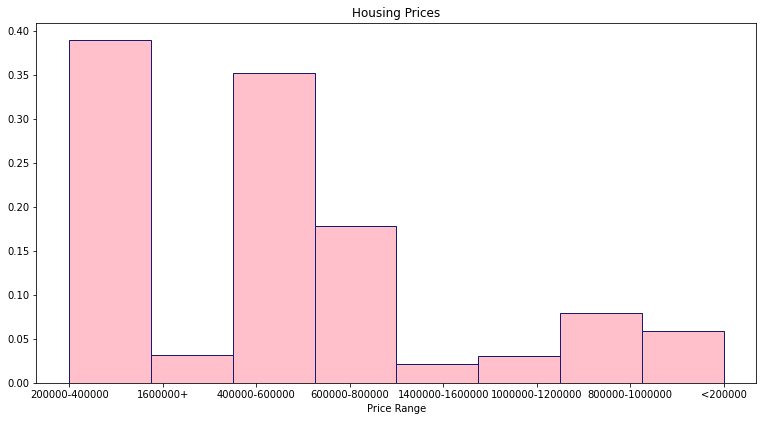

In [20]:
#Graph showing the distribution of houses prices represented by histogram
fig = plt.figure(figsize=(10,5))
his=fig.add_axes([0,0,1,1])
plt.hist(df['price_range'],density=True, color='pink',edgecolor='midnightblue',bins=8)
plt.title('Housing Prices')
plt.xlabel('Price Range')
plt.show()

In [24]:
#Average house prices across the top 10 cities
top_avg = df.groupby('city')['price'].mean()
top_city= top_avg.sort_values(ascending=False)
avgprice_topcities= top_city.head(10)
avgprice_topcities

city
Medina                2.046559e+06
Clyde Hill            1.321945e+06
Yarrow Point          1.194838e+06
Mercer Island         1.123818e+06
Bellevue              8.471807e+05
Beaux Arts Village    7.450000e+05
Fall City             6.926818e+05
Sammamish             6.869176e+05
Redmond               6.676495e+05
Newcastle             6.660467e+05
Name: price, dtype: float64

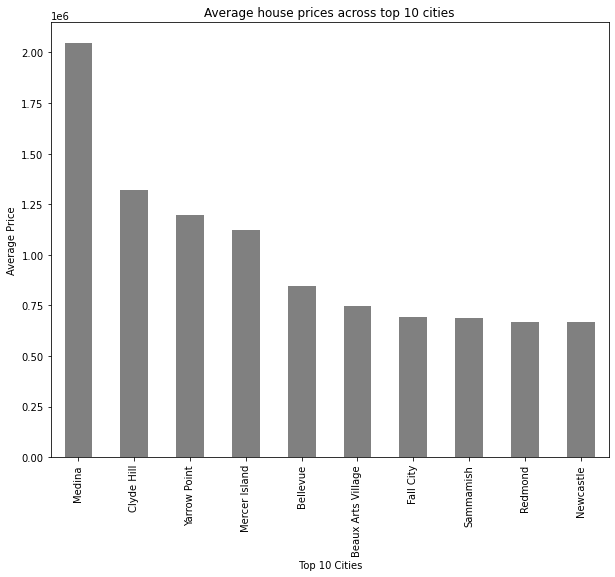

In [25]:
#Distribution of Average Prices in top 10 cities- Using Bar Chart
fig = plt.figure(figsize=(10,8))
avgprice_topcities.plot(kind = 'bar',width=0.5 ,color='grey')

plt.title('Average house prices across top 10 cities')
plt.xlabel(' Top 10 Cities')
plt.ylabel('Average Price')
plt.show()

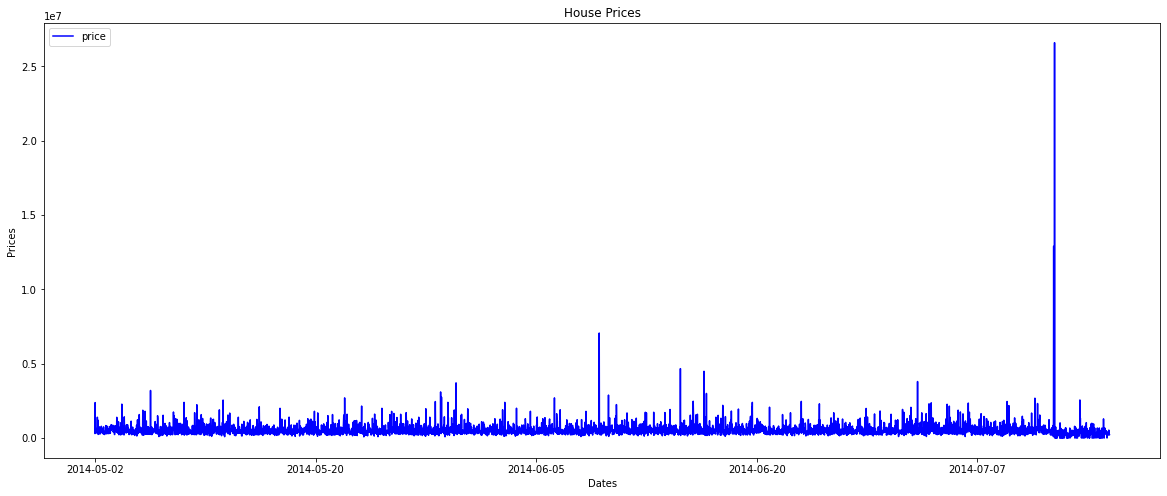

In [29]:
from pyparsing import line
#The trend of house prices from the earliest date to the latest date in the dataset-Using the Line Chart to follow trend analysis
#Convert to Python datetime
df['date_time'] = pd.to_datetime(df['date'])
df['date_time'] = pd.to_datetime(df.date_time).dt.strftime('%Y-%m-%d')
df.plot(x='date_time', y= 'price',color='blue', figsize = (20,8))
plt.legend(loc = 'upper left')
plt.title('House Prices')
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.show()

In [30]:
#Maximum bedroom size across the top 10 cities
top_max = df.groupby('city')['bedrooms'].max()
max_bed= top_max.sort_values(ascending=False)
bedroommax_topcities= max_bed.head(10)
bedroommax_topcities

city
Seattle             9.0
Shoreline           8.0
Renton              7.0
Auburn              7.0
Lake Forest Park    7.0
Issaquah            7.0
Redmond             7.0
Mercer Island       7.0
Bellevue            7.0
Snoqualmie          6.0
Name: bedrooms, dtype: float64

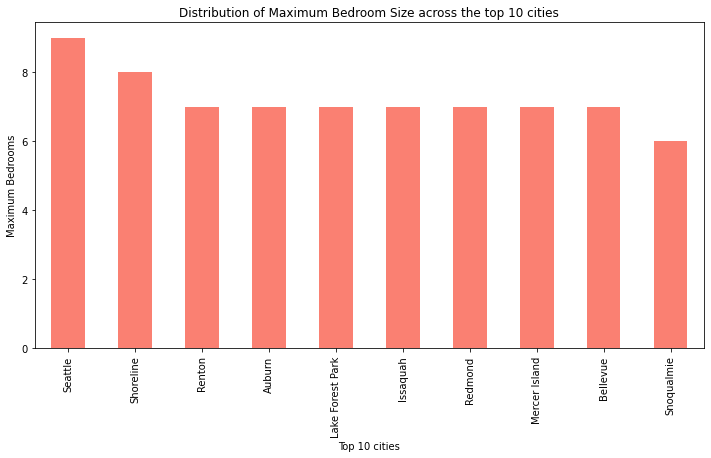

In [32]:
#Distribution of Maximum bedroom size across the top 10 cities- Using a Bar chart
fig = plt.figure(figsize=(12,6))
bedroommax_topcities.plot(kind = 'bar',color="salmon",width=0.5)
plt.title('Distribution of Maximum Bedroom Size across the top 10 cities')
plt.xlabel('Top 10 cities')
plt.ylabel('Maximum Bedrooms')
plt.show()

In [33]:
#Oldest Houses across top 10 cities- Houses before the 21st Century 
old_house = df.loc[df['yr_built']< 2000]
top_old = old_house.groupby('city')['yr_built'].count()
oldest= top_old.sort_values(ascending=False)
oldest_topcities= oldest.head(10)
oldest_topcities

city
Seattle        1253
Bellevue        252
Renton          205
Kent            157
Redmond         152
Kirkland        148
Auburn          141
Federal Way     138
Sammamish       121
Shoreline       115
Name: yr_built, dtype: int64

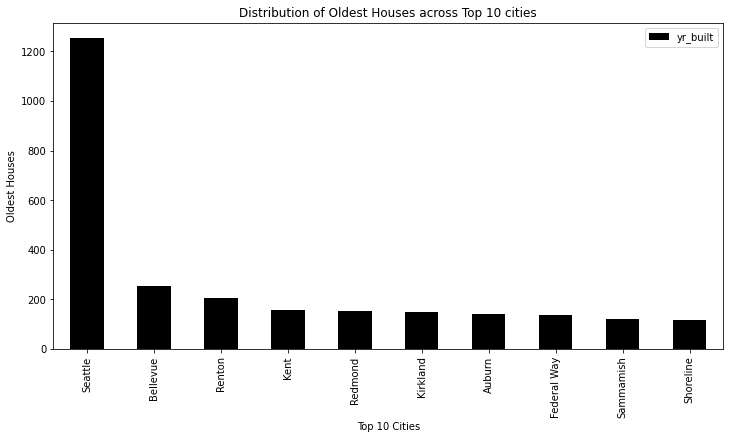

In [35]:
#Distribution of Oldest Houses in Top 10 Cities- Using Bar Chart
fig=plt.figure(figsize=(12,6))
oldest_topcities.plot( kind='bar',color='black',width=0.5)
plt.legend(loc = 'upper right')
plt.title('Distribution of Oldest Houses across Top 10 cities')
plt.xlabel("Top 10 Cities")
plt.ylabel("Oldest Houses")
plt.show()

In [36]:
#Years Houses were last Renovated
home_renovate= df.loc[df['yr_renovated']!=0].reset_index()
count_house= home_renovate.groupby('yr_renovated')['country'].count()
yr_renovate=count_house.sort_values(ascending=False)
yr_renovate.head()

yr_renovated
2000    170
2003    151
2009    109
2001    109
2005     95
Name: country, dtype: int64

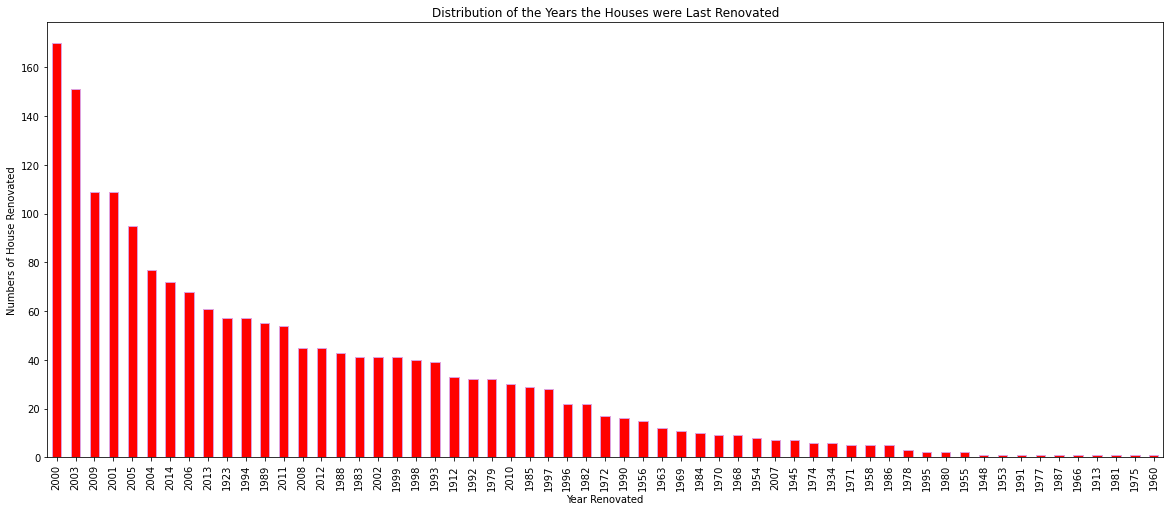

In [38]:
#Distribution of Years houses were last Renovated- Using a Bar Chart
fig = plt.figure(figsize=(20,8))
yr_renovate.plot(kind = 'bar',color='red', edgecolor='plum',width=0.5)
plt.title('Distribution of the Years the Houses were Last Renovated')
plt.xlabel('Year Renovated')
plt.ylabel('Numbers of House Renovated')
plt.show()

In [39]:
#Average Basement Square Feets across Top 10 cities
house_sqft = df.loc[df['sqft_basement']!=0]
top_sqft = house_sqft.groupby('city')['sqft_basement'].mean()
sqft_avg= top_sqft.sort_values(ascending=False)
avg_sqft =sqft_avg.head(10)
avg_sqft

city
Clyde Hill       1510.000000
Medina           1504.000000
Mercer Island    1219.260870
Bellevue         1031.056338
Carnation        1030.000000
Kenmore           955.454545
Woodinville       926.437500
Snoqualmie        857.777778
Normandy Park     845.000000
Issaquah          838.133333
Name: sqft_basement, dtype: float64

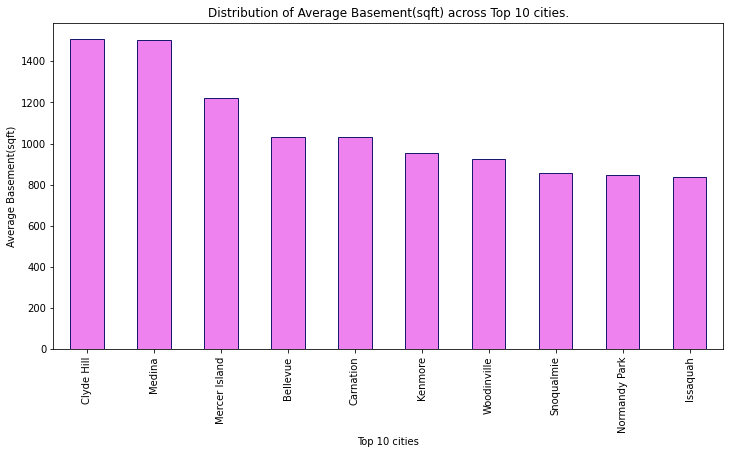

In [40]:
#Distribution of Average Basement Square Feets across Top 10 cities-Using a Bar Chart
fig = plt.figure(figsize=(12,6))
avg_sqft.plot(kind = 'bar',color='violet',edgecolor ='midnightblue', width=0.5)
plt.title('Distribution of Average Basement(sqft) across Top 10 cities.')
plt.xlabel('Top 10 cities')
plt.ylabel('Average Basement(sqft)')
plt.show()

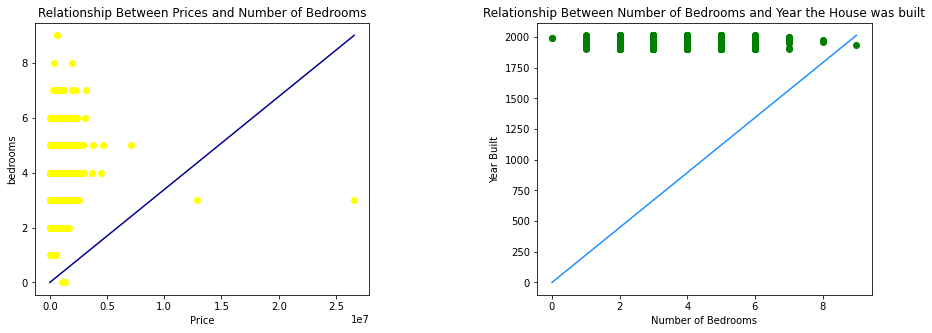

In [43]:
#Relationship between Prices and Number of Bedrooms- Using Scatterplot to see correlation implementing Diagonal line
fig,((ax1,ax2))=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

x=[0, 26590000]
y=[0,9]

x1=df['price']
y1=df['bedrooms']

ax1.scatter(x1,y1, color='yellow')
ax1.plot(x,y,color='darkblue',linestyle='-')
ax1.set_title('Relationship Between Prices and Number of Bedrooms')
ax1.set_xlabel('Price')
ax1.set_ylabel('bedrooms')

#Relationship Between Number of Bedrooms and Year the House was Built-Using Scatterplot to see correlation implementing Diagonal line
x=[0,9]
y=[0,2014]

x1= df['bedrooms']
y1=df['yr_built']

ax2.scatter(x1,y1, color='green')
ax2.plot(x,y,color='dodgerblue',linestyle='-')
ax2.set_title('Relationship Between Number of Bedrooms and Year the House was built')
ax2.set_xlabel('Number of Bedrooms')
ax2.set_ylabel('Year Built')
plt.subplots_adjust(wspace=0.5, hspace=0.5)